In [1]:
!pip install keras-preprocessing

from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                             image     label
0         images/train\angry\Training_10118481.jpg     angry
1         images/train\angry\Training_10120469.jpg     angry
2         images/train\angry\Training_10131352.jpg     angry
3         images/train\angry\Training_10161559.jpg     angry
4          images/train\angry\Training_1021836.jpg     angry
...                                            ...       ...
28704  images/train\surprise\Training_99916297.jpg  surprise
28705  images/train\surprise\Training_99924420.jpg  surprise
28706  images/train\surprise\Training_99937001.jpg  surprise
28707  images/train\surprise\Training_99951755.jpg  surprise
28708  images/train\surprise\Training_99984132.jpg  surprise

[28709 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)
print(test['image'])

                                             image     label
0       images/test\angry\PrivateTest_10131363.jpg     angry
1       images/test\angry\PrivateTest_10304478.jpg     angry
2        images/test\angry\PrivateTest_1054527.jpg     angry
3       images/test\angry\PrivateTest_10590091.jpg     angry
4        images/test\angry\PrivateTest_1109992.jpg     angry
...                                            ...       ...
7173  images/test\surprise\PublicTest_98089595.jpg  surprise
7174  images/test\surprise\PublicTest_98567249.jpg  surprise
7175  images/test\surprise\PublicTest_98972870.jpg  surprise
7176  images/test\surprise\PublicTest_99242645.jpg  surprise
7177  images/test\surprise\PublicTest_99446963.jpg  surprise

[7178 rows x 2 columns]
0         images/test\angry\PrivateTest_10131363.jpg
1         images/test\angry\PrivateTest_10304478.jpg
2          images/test\angry\PrivateTest_1054527.jpg
3         images/test\angry\PrivateTest_10590091.jpg
4          images/test\angry\Pr

In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [10]:
train_features = extract_features(train['image']) 

  0%|          | 0/28709 [00:00<?, ?it/s]

C:\Users\madhu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [16]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [17]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [18]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

C:\Users\madhu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
 12/225 ━━━━━━━━━━━━━━━━━━━━ 5:47 2s/step - accuracy: 0.2540 - loss: 1.8099

KeyboardInterrupt: 

In [22]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")


In [23]:
from keras.models import model_from_json

In [24]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [25]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [26]:
image = 'images/train/sad/Training_2913.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


C:\Users\madhu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
model prediction is  happy


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
model prediction is  happy


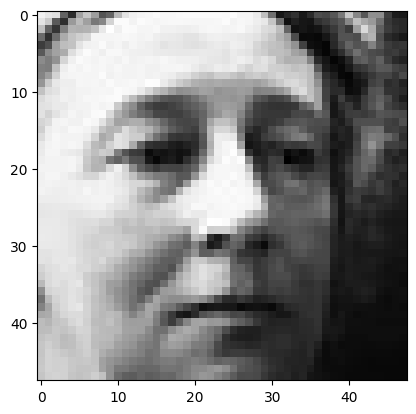

In [28]:
image = 'images/train/sad/Training_2913.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
model prediction is  happy


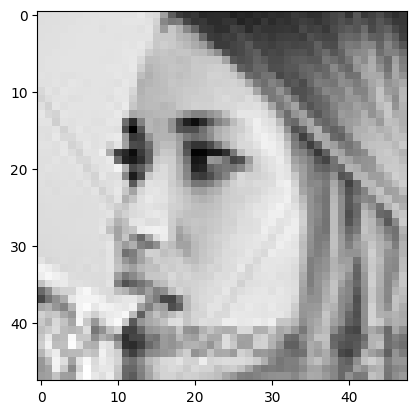

In [29]:
image = 'images/train/fear/Training_12567.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
model prediction is  happy


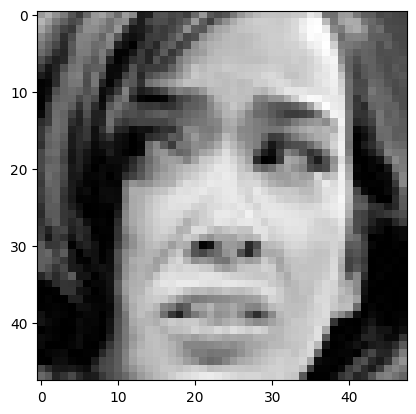

In [30]:
image = 'images/train/disgust/Training_659019.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
model prediction is  happy


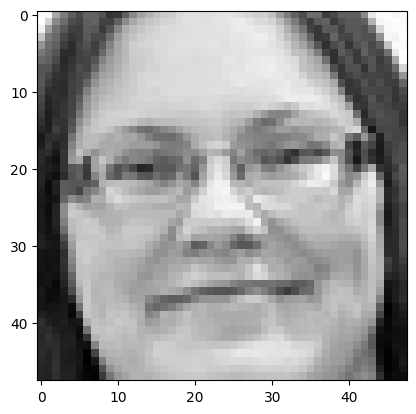

In [31]:
image = 'images/train/happy/Training_1206.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
model prediction is  happy


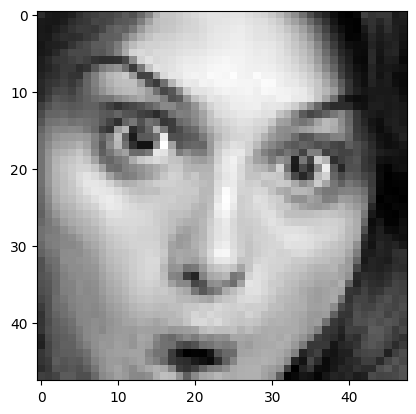

In [32]:
image = 'images/train/surprise/Training_8796.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
model prediction is  happy


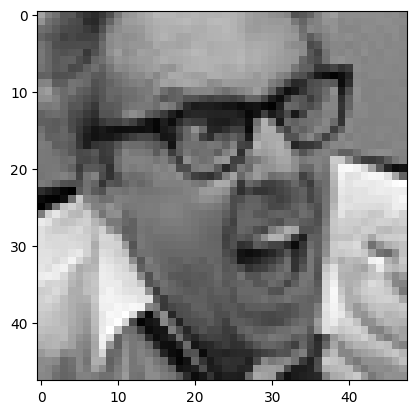

In [33]:
image = 'images/train/angry/Training_3908.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
model prediction is  happy


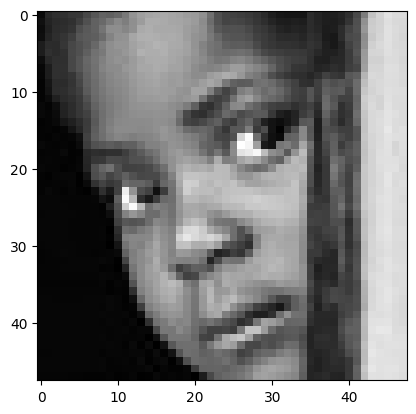

In [34]:
image = 'images/train/neutral/Training_65667.jpg'
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [43]:
import cv2
import numpy as np
import torch
import torch.nn.functional as F

### pip install opencv-python
## pip install opencv-contrib-python fullpackage
#from deepface import DeepFace pip install deepface
path = "haarcascade_frontalface_default.xml"
font_scale=1.5
font= cv2.FONT_HERSHEY_PLAIN

#set the rectangle background to white
rectangle_bgr = (255, 255, 255)

#make a black image
img = np.zeros((500, 500))
#set some text
text= "Some text in a box!"
#get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
#set the text stort position
text_offset_x = 10
text_offset_y = img.shape[0] - 25
#make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width+ 2, text_offset_y- text_height- 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

cap=cv2.VideoCapture(1)
#Check if the webcam is opened correctly
if not cap.isOpened():
   cap = cv2.VideoCapture(0)
if not cap.isOpened():
   raise IOError("Cannot open webcam")
 
while True:
    ret,frame= cap.read()
    #eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades haarcascade eye.xml")
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
    gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCoscade.empty())
    faces =faceCascade.detectMultiScale(gray, 1.1,4)
    for x,y,w,h in faces:
        roi_gray= gray[y:y+h, x:x+w]
        roi_color= frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        facess= faceCascade.detectMultiScale(roi_gray)
        if len(facess)==0:
           print("Face not detected")
        else:
           for (ex, ey, ew,eh) in facess:
                face_roi= roi_color[ey: ey+eh, ex:ex + ew] # cropping the face

        graytemp = cv2.cvtColor(face_roi, cv2.COLOR_BGR2GRAY)
        final_image= cv2.resize(graytemp, (48,48))
        final_image = np.expand_dims(final_image, axis =0) #odd thir dimension
        final_image = np.expand_dims(final_image, axis = 0) #add fourth dimension
        final_image= final_image/255.0 #normalization
        dataa = torch.from_numpy(final_image)
        dataa = dataa.type(torch.FloatTensor)
        dataa = dataa.to(device)
        outputs = net(dataa)
        Pred= F.softmax(outputs, dim=l)
        Predictions = torch.argmax(Pred)
        print(Predictions)

    font = cv2.FONT_HERSHEY_SIMPLEX

    font_scale =1.5
    font =cv2.FONT_HERSHEY_PLAIN

    if ((Predictions)==0):
        status= "Angry"

        x1,y1,w1,h1= 0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+w1, y1+ h1), (0,0,0), -1)
        #Add text
        cv2.putText(frame, status, (x1+ int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))

    elif ((Predictions)==1):
        status= "Disgust"

        x1,y1,w1,h1= 0,0,175,75
        #Drow block background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+w1, y1+ h1), (0,0,0), -1)
        #Add text
        cv2.putText(frame, status, (x1+ int(w1/10), y1 +int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))

    elif ((Predictions)==2):
        status= "Fear"

        x1,y1,w1,h1 = 0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+w1, y1+ h1), (0,0,0), -1)
        #Add text
        cv2.putText(frame, status, (x1+ int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))

    elif ((Predictions)==3):
        status ="Happy"

        x1,y1,w1,h1= 0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+w1, y1+ h1), (0,0,0), -1)
        #Add text
        cv2.putText(frame, status, (x1+ int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))

    elif ((Predictions)==4):
        status ="Sad"

        x1,y1,w1,h1 = 0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+w1, y1+ h1), (0,0,0), -1)
        #Add text
        cv2.putText(frame, status, (x1+ int(w1/10), y1+ int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))

    elif ((Predictions)==5):
        status ="Surprise"

        x1,y1,wl,h1= 0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1+ h1), (0,0,0),1)
        #Add text
        cv2.putText(frame, status, (x1+ int(w1/10),y1+ int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))

    else:
        status= "Neutral"

        x1,y1,w1,h1 = 0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1), (0,0,0), -1)
        #Add text
        cv2.putText(frame, status, (x1+ int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)

        cv2.putText(frame, status, (100, 150), font, 3, (0, 255,0),2,cv2.LINE_4)

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0, 255))

TypeError: to() received an invalid combination of arguments - got (cv2.VideoCapture), but expected one of:
 * (torch.device device = None, torch.dtype dtype = None, bool non_blocking = False, bool copy = False, *, torch.memory_format memory_format = None)
 * (torch.dtype dtype, bool non_blocking = False, bool copy = False, *, torch.memory_format memory_format = None)
 * (Tensor tensor, bool non_blocking = False, bool copy = False, *, torch.memory_format memory_format = None)
